In [337]:
import numpy as np
import matplotlib.pyplot as plt

In [321]:
disconnections = []
mean_messages = []
std_messages = []
mean_dist2neighbors = []
std_dist2neighbors = []
mean_dist2target = []
std_dist2target = []
mean_dist2obstacle = []
std_dist2obstacle = []
mean_MSE_x = []
std_MSE_x = []
mean_MSE_y = []
std_MSE_y = []

N = 20
exp = 1
Experiments = ["SC_0.8", "SC_med", "SC_very_low", "SC_med_w20rounds"]

for id in Experiments:
    disconnections.append(np.load(f"Stats/disconnections_{id}.npy"))
    messages = np.load(f"Stats/messages_{id}.npy")
    dist2neighbors = np.load(f"Stats/dist2neighbors_{id}.npy")
    dist2target = np.load(f"Stats/dist2target_{id}.npy")
    dist2obstacle = np.load(f"Stats/dist2obstacle_{id}.npy")
    abs_error = np.load(f"Stats/abs_error_{id}.npy")

    mean_messages.append(np.mean(messages, axis=1))
    std_messages.append(np.std(messages, axis=1))

    mean_dist2neighbors.append(np.mean(dist2neighbors, axis=1))
    std_dist2neighbors.append(np.std(dist2neighbors, axis=1))

    mean_dist2target.append(np.mean(dist2target, axis=1))
    std_dist2target.append(np.std(dist2target, axis=1))

    mean_dist2obstacle.append(np.mean(dist2obstacle, axis=1))
    std_dist2obstacle.append(np.std(dist2obstacle, axis=1))

    mean_MSE_x.append(np.mean(abs_error[:, :, 0], axis=1))
    std_MSE_x.append(np.std(abs_error[:, :, 0], axis=1))

    mean_MSE_y.append(np.mean(abs_error[:, :, 1], axis=1))
    std_MSE_y.append(np.std(abs_error[:, :, 1], axis=1))

In [334]:
stamps = np.arange(150)
colors = ['brown', 'darkorange', 'pink', 'darkolivegreen','royalblue', 'black']

def plotME(data_mean, data_std, ylabel, xlabel, ylim, xlim):
    for id in range(len(Experiments)):
        plt.plot(stamps, data_mean[id], color=colors[id], label=f"Experiment {id+1}")
        plt.fill_between(stamps, data_mean[id] + data_std[id], data_mean[id] - data_std[id], color=colors[id], alpha=0.2)

    if ylim is not None:
        plt.ylim([0, ylim])
    if xlim is not None:
        plt.xlim([50, 90])
        #plt.xlim([0, xlim])
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    plt.legend()
    plt.savefig(ylabel + '.pdf', bbox_inches='tight')
    plt.show()

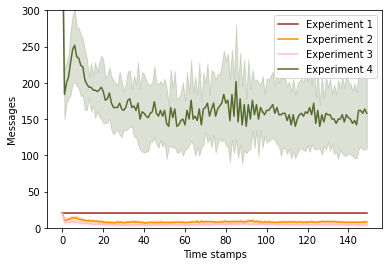

In [329]:
plotME(mean_messages, std_messages, "Messages", "Time stamps", 300, None)

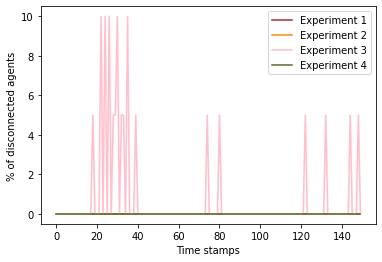

In [330]:
plotME(np.asarray(disconnections)*100/N, np.zeros(len(disconnections[0])), "% of disconnected agents", "Time stamps", None, None)

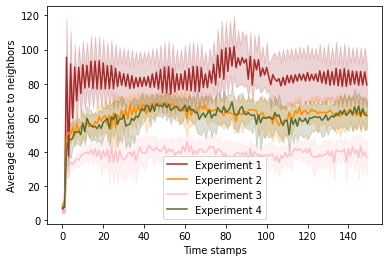

In [331]:
plotME(mean_dist2neighbors, std_dist2neighbors, "Average distance to neighbors", "Time stamps", None, None)

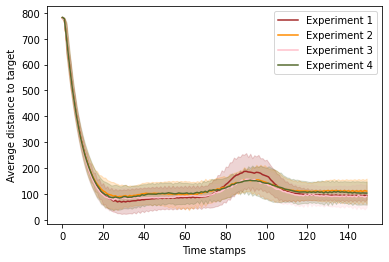

In [332]:
plotME(mean_dist2target, std_dist2target, "Average distance to target", "Time stamps", None, None)

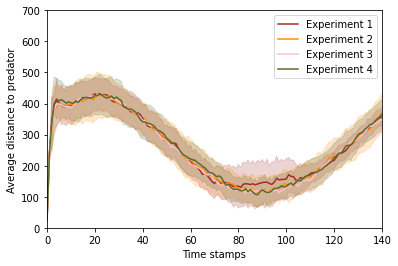

In [333]:
plotME(mean_dist2obstacle, std_dist2obstacle, "Average distance to predator", "Time stamps", 700, 140)

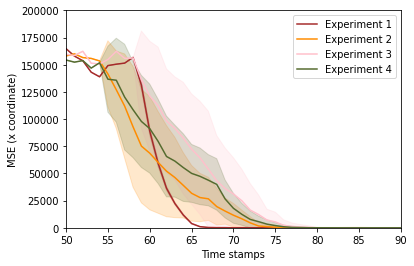

In [335]:
plotME(mean_MSE_x, std_MSE_x, "MSE (x coordinate)", "Time stamps", 200000, 140)

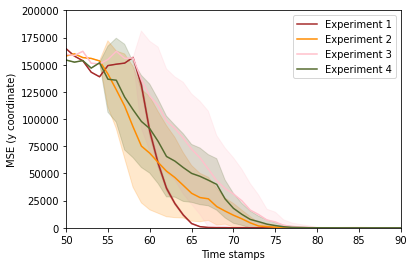

In [336]:
plotME(mean_MSE_x, std_MSE_x, "MSE (y coordinate)", "Time stamps", 200000, 140)

In [ ]:
Experiments = ["SC_0.8", "SC_med", "SC_low", "SC_very_low_w20rounds", "SC_med_w20rounds"]